## **Final Project MECENG276DS**
#### Predicting bankruptcy using feature selction

In [ ]:
# =============================================================================
# Imports & Setup
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics & Machine Learning
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, recall_score, f1_score,
                             confusion_matrix, classification_report)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import cross_val_score

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed

# Display utilities
from IPython.display import display

# Set plot style
plt.style.use('ggplot')

# Define a fixed seed for reproducibility across experiments
rng_seed = 2434

## **1. Introduction**
See project report

### **2. Explolatory Data Analysis**
Reading the csv file:

In [ ]:
data = pd.read_csv('data.csv')
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

#### 2.1. Structure of the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

#### 2.2 Class Distribution

Status  Count  Percentage
0       0   6599       96.77
1       1    220        3.23

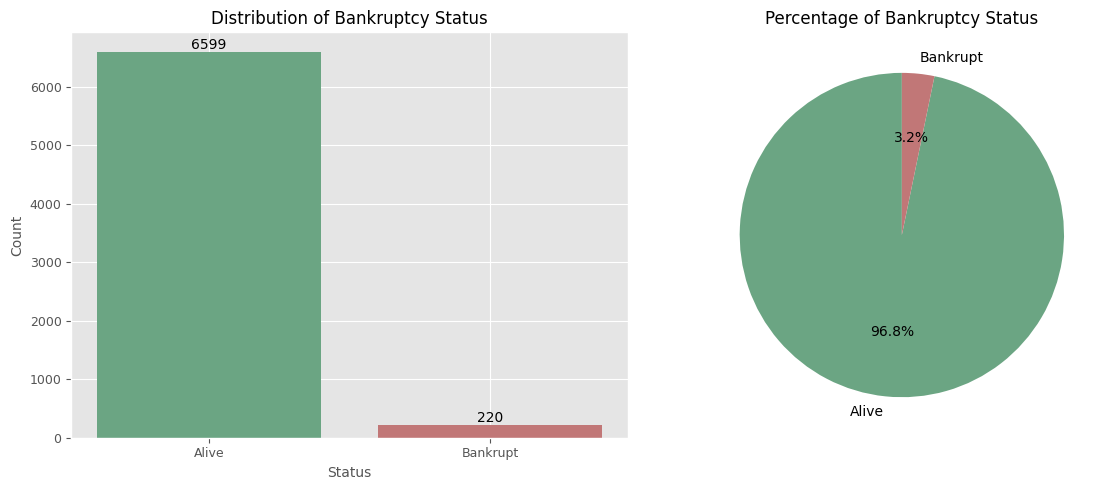

In [ ]:
status_counts = data['Bankrupt?'].value_counts()

status_table = pd.DataFrame({
    'Status': status_counts.index,
    'Count': status_counts.values,
    'Percentage': (status_counts.values / len(data) * 100).round(2)
})

display(status_table)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart on the left
bars = axes[0].bar(['Alive', 'Bankrupt'], status_table['Count'], color=['#6BA583', '#C17777'])
axes[0].set_title('Distribution of Bankruptcy Status', fontsize=12)
axes[0].set_xlabel('Status', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].tick_params(axis='both', labelsize=9)

# Add numbers on top of the bars
for bar, count in zip(bars, status_table['Count']):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{count}',
                 ha='center', va='bottom', fontsize=10, color='black')

# Pie Chart on the right
axes[1].pie(
    status_table['Count'],
    labels=['Alive', 'Bankrupt'],
    autopct='%1.1f%%',
    colors=['#6BA583', '#C17777'],
    startangle=90,
    textprops={'fontsize': 10}
)
axes[1].set_title('Percentage of Bankruptcy Status', fontsize=12)

plt.tight_layout()
plt.show()


#### 2.3 Preprocessing

##### 2.3.1 Checking for Null-values

In [ ]:
print(f"Any missing values: {data.isnull().any().any()}")

Any missing values: False


##### 2.3.2 Checking for duplicates  

In [ ]:
print(f"Any duplicates: {data.duplicated().any()}")

Any duplicates: False


##### 2.3.3 Splitting & Scaling the data

In [ ]:
#Splitting the data so that 20% of the original dataset constitutes the test data

input = data.drop(['Bankrupt?'], axis = 1)
output = data['Bankrupt?']

Xtrain_ustd, Xtest, ytrain, ytest = train_test_split(input,
                                                output,
                                                test_size=.2,
                                                random_state=rng_seed)

In [ ]:
#Scaling (Standardization)

scaler = StandardScaler()
scaler.fit(Xtrain_ustd)
Xtrain = pd.DataFrame(scaler.transform(Xtrain_ustd), columns=Xtrain_ustd.columns, index=Xtrain_ustd.index)

In [ ]:
Xtrain.describe()

ROA(C) before interest and depreciation before interest  \
count                                       5.455000e+03         
mean                                        3.829506e-16         
std                                         1.000092e+00         
min                                        -8.292924e+00         
25%                                        -4.704710e-01         
50%                                        -3.626830e-02         
75%                                         4.943795e-01         
max                                         8.125142e+00         

       ROA(A) before interest and % after tax  \
count                            5.455000e+03   
mean                            -5.718208e-16   
std                              1.000092e+00   
min                             -8.473014e+00   
25%                             -3.477843e-01   
50%                              2.314204e-02   
75%                              4.573367e-01   
max                              6.698162e+00   

       ROA(B) before interest and depreciation after tax  \
count                                       5.455000e+03   
mean                                        3.829506e-16   
std                                         1.000092e+00   
min                                        -8.940325e+00   
25%                                        -4.277292e-01   
50%                                        -1.824944e-02   
75%                                         4.915464e-01   
max                                         7.213155e+00   

       Operating Gross Margin  Realized Sales Gross Margin  \
count            5.455000e+03                 5.455000e+03   
mean            -7.528757e-16                -5.001804e-15   
std              1.000092e+00                 1.000092e+00   
min             -3.416459e+01                -3.419602e+01   
25%             -4.219685e-01                -4.220185e-01   
50%             -1.111399e-01                -1.127156e-01   
75%              3.355624e-01                 3.323886e-01   
max              2.203079e+01                 2.205331e+01   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count           5.455000e+03               5.455000e+03   
mean            8.756544e-14              -1.622843e-14   
std             1.000092e+00               1.000092e+00   
min            -3.482839e+01              -4.630497e+01   
25%             1.108344e-02              -7.132299e-03   
50%             6.273424e-02               1.255371e-02   
75%             1.308194e-01               4.145483e-02   
max             1.008436e+00               5.180269e+01   

       After-tax net Interest Rate  \
count                 5.455000e+03   
mean                 -1.653982e-14   
std                   1.000092e+00   
min                  -4.608034e+01   
25%                  -2.567566e-03   
50%                   1.434321e-02   
75%                   3.889502e-02   
max                   5.075089e+01   

       Non-industry income and expenditure/revenue  \
count                                 5.455000e+03   
mean                                  1.636007e-15   
std                                   1.000092e+00   
min                                  -3.457664e+01   
25%                                  -1.779189e-02   
50%                                  -9.437664e-03   
75%                                  -6.154674e-04   
max                                   6.119238e+01   

       Continuous interest rate (after tax)  ...  Net Income to Total Assets  \
count                          5.455000e+03  ...                5.455000e+03   
mean                          -7.591931e-15  ...                2.108834e-15   
std                            1.000092e+00  ...                1.000092e+00   
min                           -2.065765e+01  ...               -1.968585e+01   
25%                           -1.210280e-02  ...               -2.635051e-01   
50%                         

### **3. Methodology**
See project report part 3 for a short explanation of each method used in this part

#### 3.1 Simple Models

For comparing the results of the more complicated and optimized models

##### 3.1.1 Logistic Regression with all features

In [ ]:
# Logistic regression pipeline using all features
simple_LogReg_model = Pipeline([('scaler', StandardScaler()),
                 ('logreg', LogisticRegression(random_state=rng_seed)) ])

##### 3.1.2 Logistic Regression with the most correlated features

[' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)']


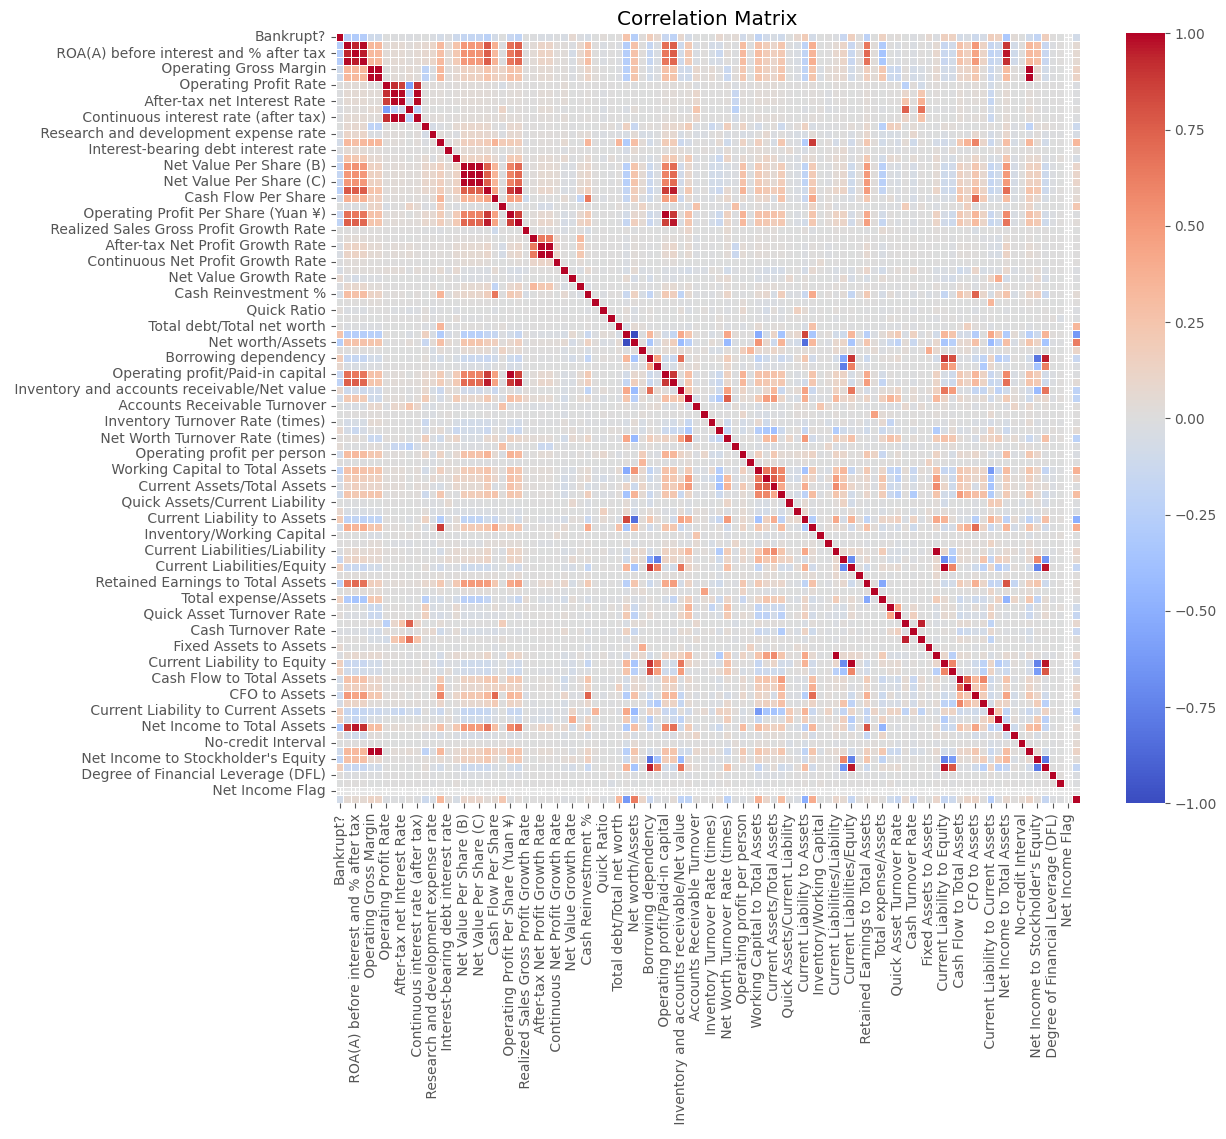

Top 10 most correlated features:
Net Income to Total Assets                                 0.315457
ROA(A) before interest and % after tax                     0.282941
ROA(B) before interest and depreciation after tax          0.273051
ROA(C) before interest and depreciation before interest    0.260807
Net worth/Assets                                           0.250161
Debt ratio %                                               0.250161
Persistent EPS in the Last Four Seasons                    0.219560
Retained Earnings to Total Assets                          0.217779
Net profit before tax/Paid-in capital                      0.207857
Per Share Net profit before tax (Yuan ¥)                   0.201395
Name: Bankrupt?, dtype: float64


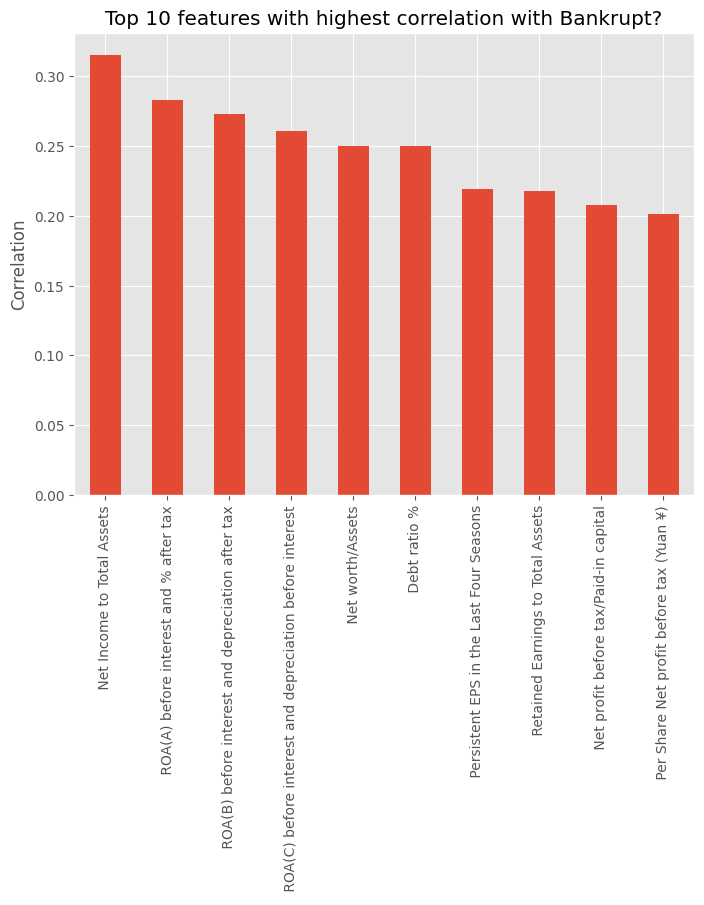

In [ ]:
CorrMat = data.corr()
corr_target = CorrMat.loc["Bankrupt?"]
corr_target_sort = corr_target.abs().sort_values(ascending=False)
top_corr_features = corr_target_sort.drop('Bankrupt?')[:10]
features_Corr = top_corr_features.index.tolist()
print(features_Corr)

plt.figure(figsize=(12, 10))
sns.heatmap(CorrMat, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print(f'Top 10 most correlated features:')
print(top_corr_features)
plt.figure(figsize=(8, 6))
top_corr_features.plot(kind='bar')
plt.title('Top 10 features with highest correlation with Bankrupt?')
plt.ylabel('Correlation')
plt.show()

##### 3.1.3 Variance Threshold

In [ ]:
variance = Xtrain_ustd.var()
sorted_variance = variance.sort_values(ascending=False)

features_VarTresh = [feature for feature, var in sorted_variance.items() if var > 1]
features_VarTresh

[' Quick Asset Turnover Rate',
 ' Operating Expense Rate',
 ' Inventory Turnover Rate (times)',
 ' Cash Turnover Rate',
 ' Total Asset Growth Rate',
 ' Current Asset Turnover Rate',
 ' Research and development expense rate',
 ' Fixed Assets Turnover Frequency',
 ' Inventory/Current Liability',
 ' Long-term Liability to Current Assets',
 ' Cash/Current Liability',
 ' Total assets to GNP price',
 ' Allocation rate per person',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Quick Ratio',
 ' Quick Assets/Current Liability',
 ' Revenue per person',
 ' Total debt/Total net worth',
 ' Net Value Growth Rate',
 ' Fixed Assets to Assets',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Current Ratio']

#### 3.2. Forward and Backwards Selection

In [ ]:
# Forward Selection:

def forward_selection(Xtrain, ytrain):
    remaing_features = list(Xtrain.columns)
    selected_features = []
    best_score = 0
    best_features = []
    while remaing_features:
        scores = []
        for feature in remaing_features:
            selected_features.append(feature)
            Xtrain_subset = Xtrain[selected_features]
            model = LogisticRegression(random_state=rng_seed)
            score = cross_val_score(model, Xtrain_subset, ytrain, cv=5, scoring='accuracy').mean()
            scores.append((score, feature))
            selected_features.pop()

        scores.sort(reverse=True)
        new_best_score, best_feature = scores[0]

        if new_best_score > best_score:
            selected_features.append(best_feature)
            remaing_features.remove(best_feature)
            best_score = new_best_score
            best_features = selected_features.copy()
        else:
            break

    return best_features

In [ ]:
features_fs = forward_selection(Xtrain, ytrain)

In [ ]:
features_fs

[' Net Income to Total Assets',
 ' Tax rate (A)',
 ' Long-term fund suitability ratio (A)']

In [ ]:
def backwards_selection(Xtrain, ytrain):
    selected_features = list(Xtrain.columns)
    best_score = cross_val_score(LogisticRegression(random_state=rng_seed), Xtrain, ytrain, cv=5, scoring='accuracy').mean()
    best_features = selected_features.copy()
    while len(selected_features) > 1:
        scores = []
        for feature in selected_features:
            temp_features = selected_features.copy()
            temp_features.remove(feature)
            score = cross_val_score(LogisticRegression(random_state=rng_seed), Xtrain[temp_features], ytrain, cv=5, scoring='accuracy').mean()
            scores.append((score, feature))

        scores.sort(reverse=True)
        new_best_score, best_feature = scores[0]

        if new_best_score > best_score:
            selected_features.remove(best_feature)
            best_score = new_best_score
            best_features = selected_features.copy()
        else:
            break

    return best_features

In [ ]:
features_bs = backwards_selection(Xtrain, ytrain)

In [ ]:
allFeaturesList = data.columns.tolist()
removed_features = list(set(allFeaturesList).difference(set(features_bs)))
removed_features

[' Inventory/Working Capital',
 ' Continuous Net Profit Growth Rate',
 ' Working capitcal Turnover Rate',
 'Bankrupt?']

#### 3.3 Regularization

In [ ]:
feature_names = data.drop(columns=['Bankrupt?']).columns

In [ ]:
def plot_feature_importance(best_model):
    """
    Plots feature importance for linear models (using coefficients) or ensemble methods (using feature_importances_).
    """

    # Check if the model has `named_steps` (for pipelines with logistic regression)
    if hasattr(best_model, 'named_steps') and 'logreg' in best_model.named_steps:
        # Retrieve coefficients from the logistic regression model
        theta_star = best_model.named_steps['logreg'].coef_[0, :]

        # Sort features by absolute coefficient magnitude
        sorted_indices = np.argsort(np.abs(theta_star))[::-1]  # descending order
        sorted_features = feature_names[sorted_indices]
        sorted_coefficients = np.abs(theta_star[sorted_indices])
    else:
        # For ensemble methods like RandomForest, use feature_importances_
        theta_star = best_model.feature_importances_

        # Sort features by importance
        sorted_indices = np.argsort(theta_star)[::-1]  # descending order
        sorted_features = feature_names[sorted_indices]
        sorted_coefficients = theta_star[sorted_indices]

    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': sorted_features,
        'Importance': sorted_coefficients
    })

    # Create a stem plot for all features
    plt.figure(figsize=(14, 6))
    plt.stem(sorted_features, sorted_coefficients, basefmt=" ")
    plt.title("Feature Significance", fontsize=14)
    plt.xlabel("Feature", fontsize=12)
    plt.ylabel("Coefficient Magnitude" if hasattr(best_model, 'named_steps') else "Feature Importance", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=6)
    plt.tight_layout()
    plt.show()

    # Select the top 10 features
    top_10_features = feature_importance_df.head(10)

    # Plot the top 10 features using Seaborn
    plt.figure(figsize=(10, 3))
    sns.barplot(x='Importance', y='Feature', data=top_10_features, orient='h')
    plt.title('Top 10 Significant Features', fontsize=14)
    plt.xlabel("Coefficient Magnitude" if hasattr(best_model, 'named_steps') else "Feature Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.tight_layout()
    plt.show()

    # Print the number of non-zero coefficients and their names
    if hasattr(best_model, 'named_steps') and 'logreg' in best_model.named_steps:
        nonzero_mask = (theta_star != 0)
        nonzero_features = feature_names[nonzero_mask]
        nonzero_values = theta_star[nonzero_mask]
        print(f"Out of the total {len(feature_names)} features, {len(nonzero_features)} have non-zero coefficients.")

        # Sort by absolute value again just for clarity
        sorted_nonzero_indices = np.argsort(-np.abs(nonzero_values))
        for feature, value in zip(nonzero_features[sorted_nonzero_indices], nonzero_values[sorted_nonzero_indices]):
            print(f"Feature: {feature}, Coefficient: {value:.5f}")


##### 3.3.1 LASSO regularization

In [ ]:
cvfolds = 3

# Define the pipeline with a placeholder penalty and C
LASSO_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        penalty='l1', #l1 for lasso
        solver='liblinear',
        class_weight='balanced',
        random_state=rng_seed,
        max_iter=1000))
])

# Define the parameter grid
param_grid = {
    'logreg__C': np.logspace(-3, 1, 10),
    'logreg__penalty': ['l1'] #l1 for lasso
}

# Use GridSearchCV for hyperparameter tuning
LASSO_gs = GridSearchCV(
    estimator=LASSO_model,
    param_grid=param_grid,
    scoring='recall',   # Using recall as it handles imbalance better than accuracy
    cv=cvfolds,
    refit='recall',
    n_jobs=-1  # Use all CPU cores to speed up
)

LASSO_gs.fit(Xtrain, ytrain)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           penalty='l1',
                                                           random_state=2434,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                         'logreg__penalty': ['l1']},
             refit='recall', scoring='recall')

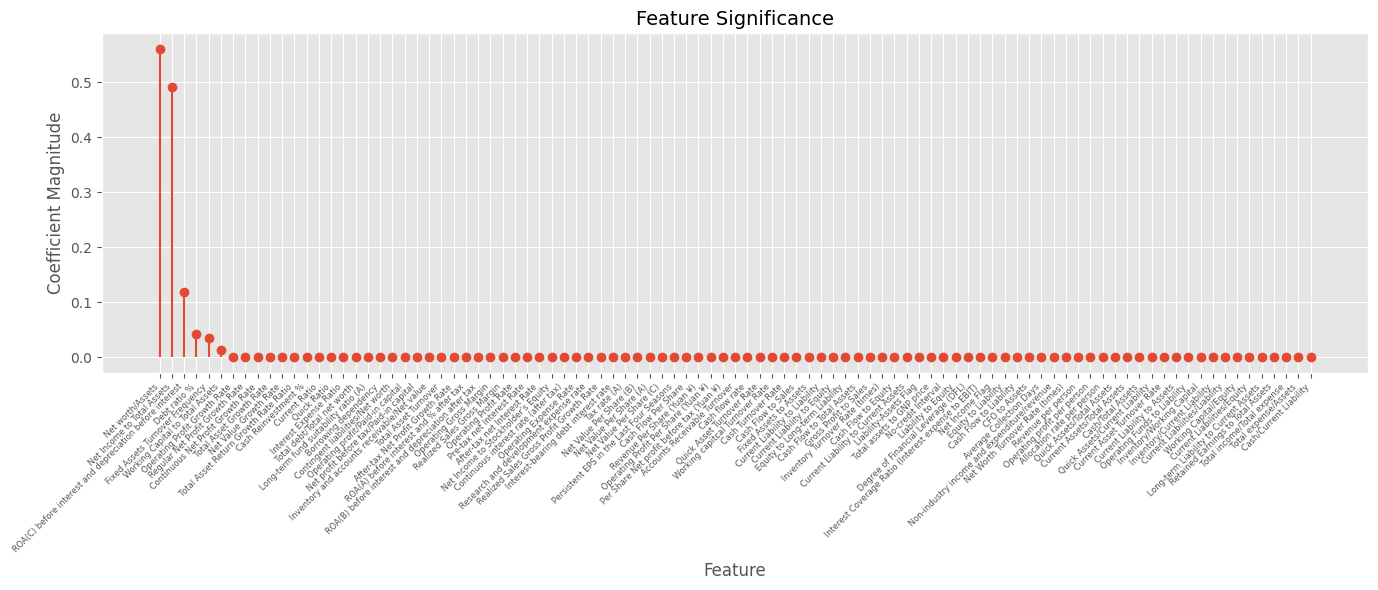

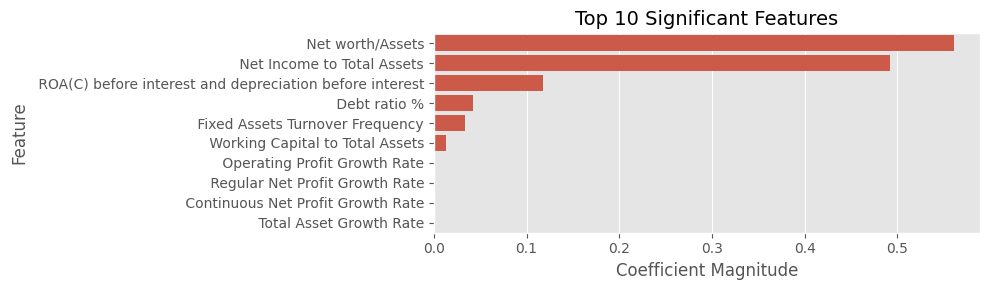

Out of the total 95 features, 6 have non-zero coefficients.
Feature:  Net worth/Assets, Coefficient: -0.56097
Feature:  Net Income to Total Assets, Coefficient: -0.49173
Feature:  ROA(C) before interest and depreciation before interest, Coefficient: -0.11758
Feature:  Debt ratio %, Coefficient: 0.04240
Feature:  Fixed Assets Turnover Frequency, Coefficient: 0.03416
Feature:  Working Capital to Total Assets, Coefficient: -0.01317


In [ ]:
# Extract the best model from the GridSearchCV
best_model_LASSO = LASSO_gs.best_estimator_

plot_feature_importance(best_model_LASSO)

##### 3.3.2 Ridge regularization

In [ ]:
cvfolds = 3

# Define the pipeline with a placeholder penalty and C
RIDGE_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        penalty='l2', #l2 for ridge
        solver='liblinear',
        class_weight='balanced',
        random_state=rng_seed,
        max_iter=1000))
])

# Define the parameter grid
param_grid = {
    'logreg__C': np.logspace(-3, 1, 10),
    'logreg__penalty': ['l2']  #l2 for lasso
}

# Use GridSearchCV for hyperparameter tuning
RIDGE_gs = GridSearchCV(
    estimator=RIDGE_model,
    param_grid=param_grid,
    scoring='recall',   # Using recall as it handles imbalance better than accuracy
    cv=cvfolds,
    refit='recall',
    n_jobs=-1  # Use all CPU cores to speed up
)

RIDGE_gs.fit(Xtrain, ytrain)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=2434,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]),
                         'logreg__penalty': ['l2']},
             refit='recall', scoring='recall')

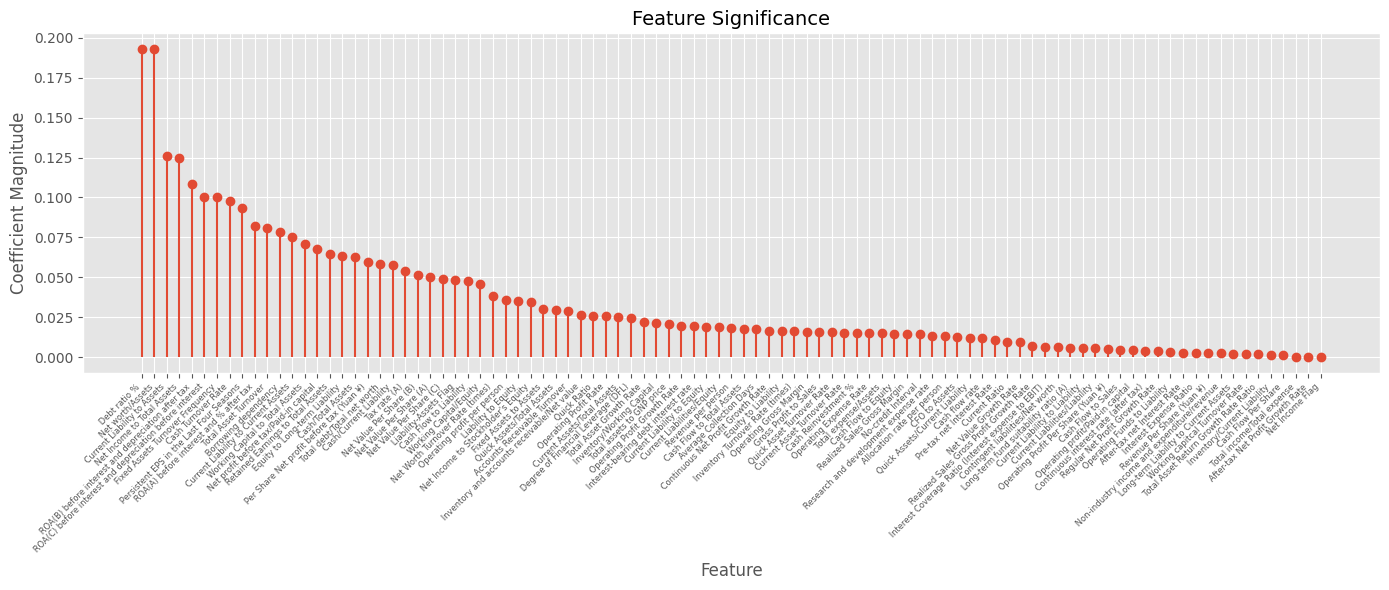

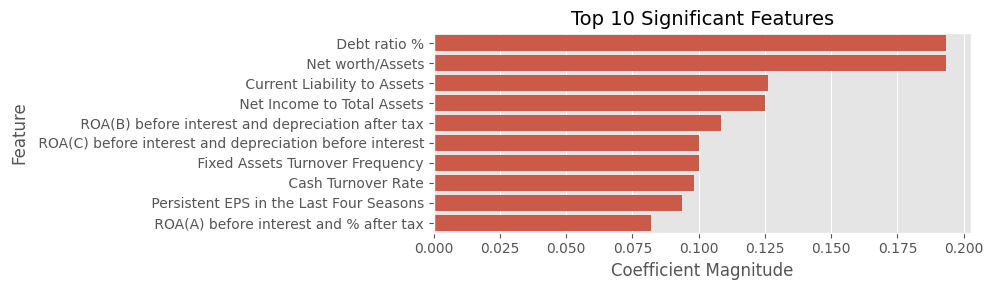

Out of the total 95 features, 94 have non-zero coefficients.
Feature:  Debt ratio %, Coefficient: 0.19317
Feature:  Net worth/Assets, Coefficient: -0.19317
Feature:  Current Liability to Assets, Coefficient: 0.12603
Feature:  Net Income to Total Assets, Coefficient: -0.12487
Feature:  ROA(B) before interest and depreciation after tax, Coefficient: -0.10856
Feature:  ROA(C) before interest and depreciation before interest, Coefficient: -0.10028
Feature:  Fixed Assets Turnover Frequency, Coefficient: 0.10004
Feature:  Cash Turnover Rate, Coefficient: -0.09807
Feature:  Persistent EPS in the Last Four Seasons, Coefficient: -0.09371
Feature:  ROA(A) before interest and % after tax, Coefficient: -0.08206
Feature:  Total Asset Turnover, Coefficient: -0.08115
Feature:  Borrowing dependency, Coefficient: 0.07832
Feature:  Current Liability to Current Assets, Coefficient: 0.07539
Feature:  Working Capital to Total Assets, Coefficient: -0.07085
Feature:  Net profit before tax/Paid-in capital, Co

In [ ]:
# Extract the best model from the GridSearchCV
best_model_RIDGE = RIDGE_gs.best_estimator_

plot_feature_importance(best_model_RIDGE)

#### 3.4. Decision Tree & Ensemble Methods

##### 3.4.1 DecisionTree

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state=rng_seed)
dt_model = dt_model.fit(Xtrain, ytrain)

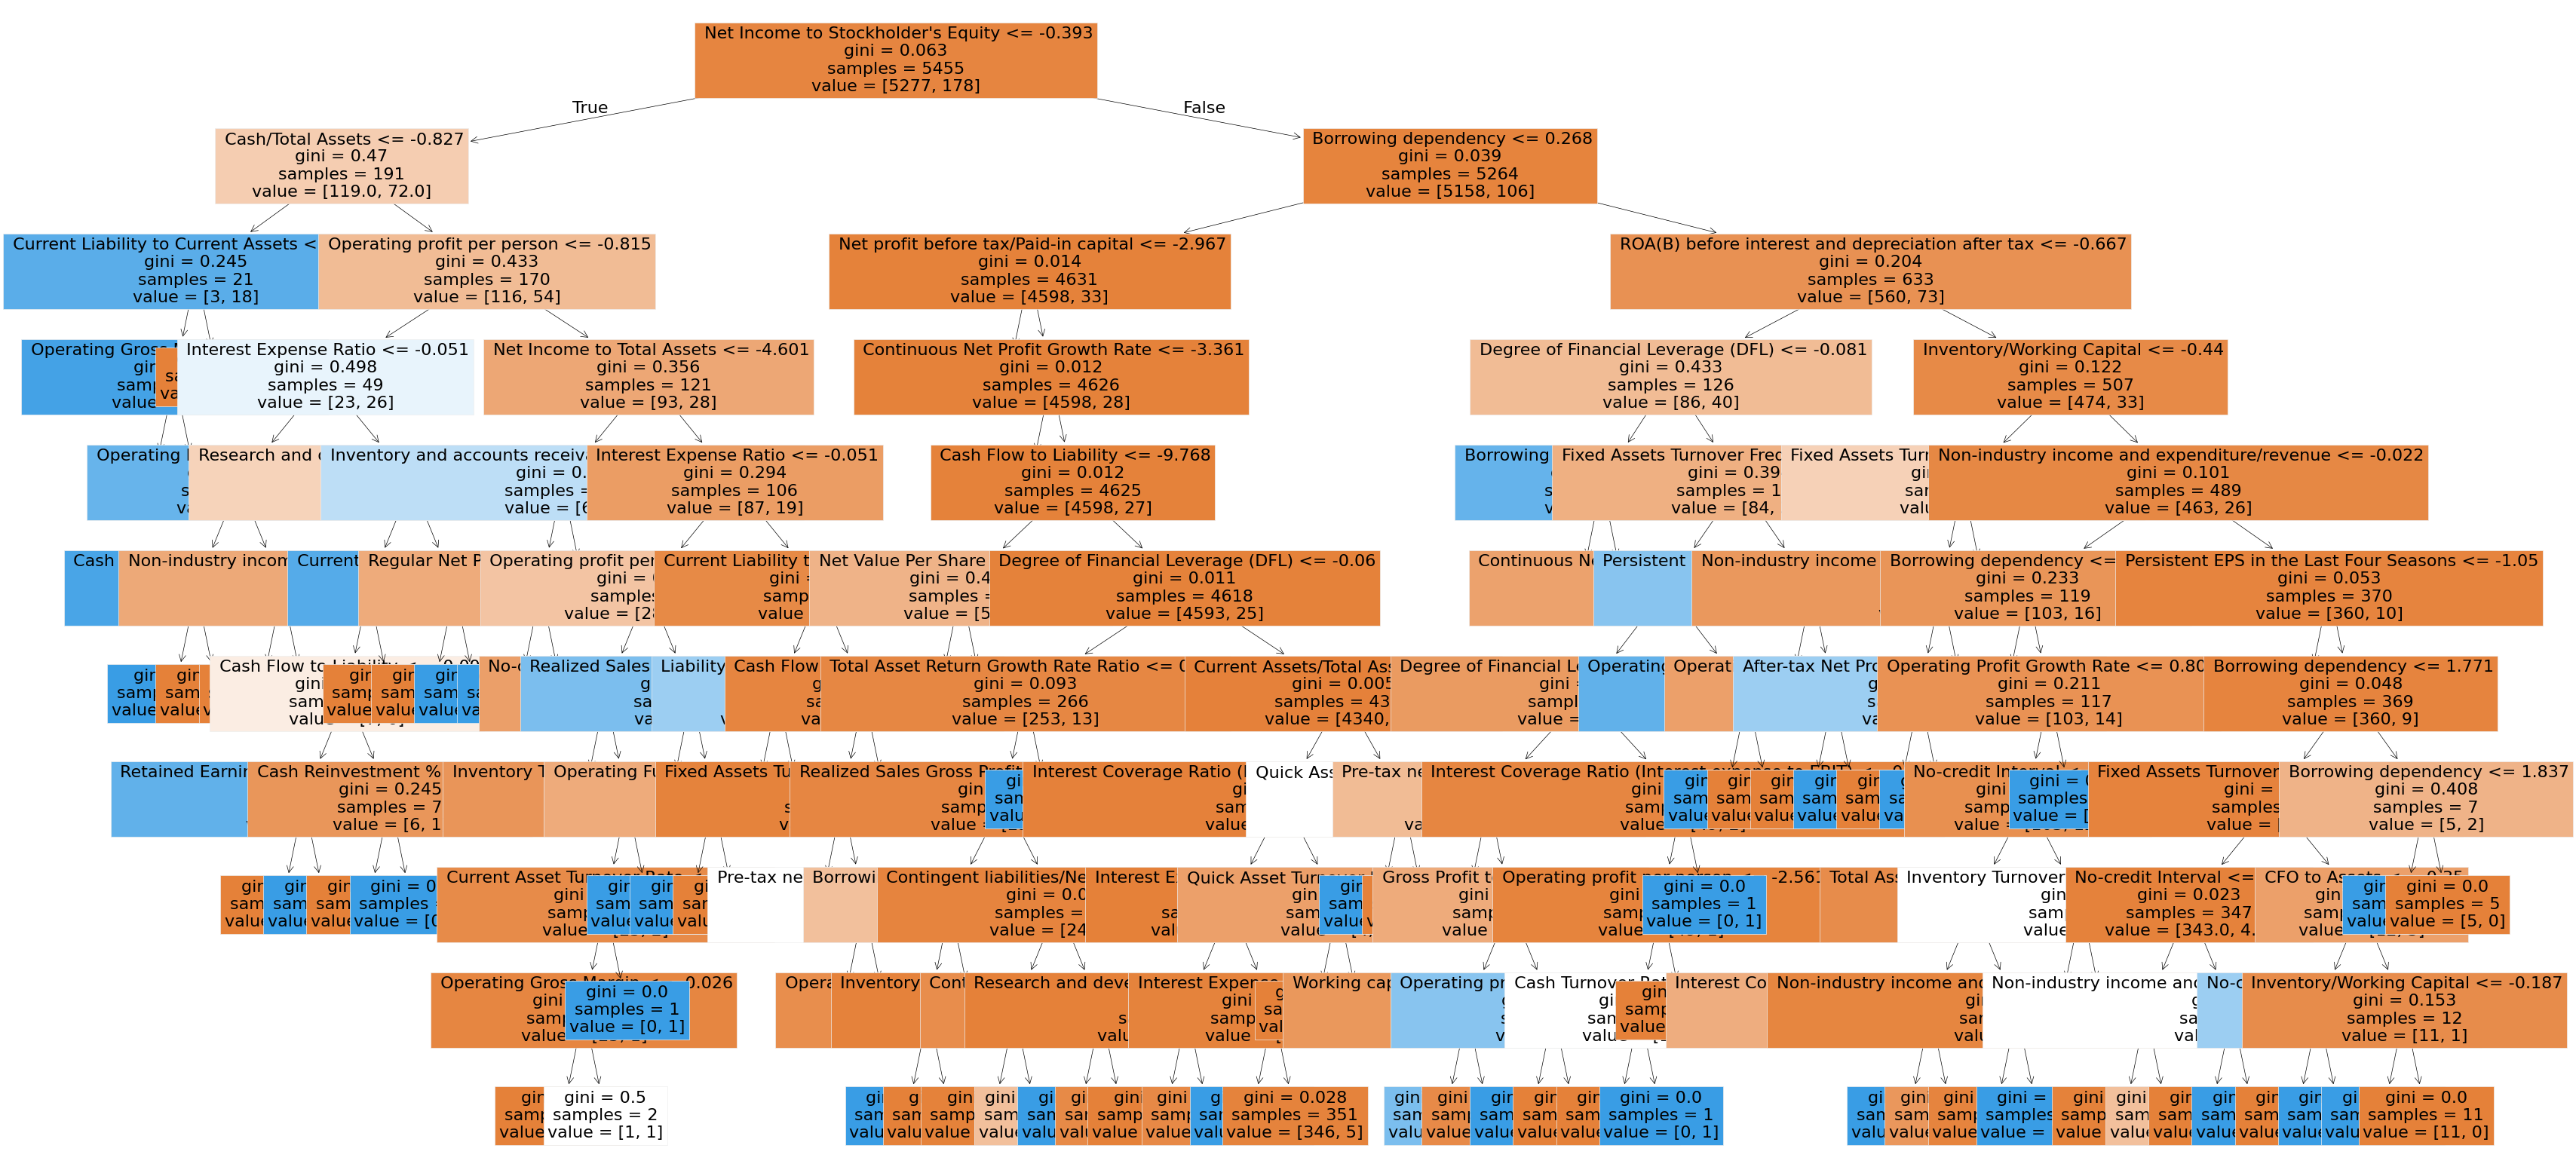

In [ ]:
plt.figure(figsize=(40,20))
plot_tree(dt_model,fontsize=16, feature_names=list(feature_names),filled=True);

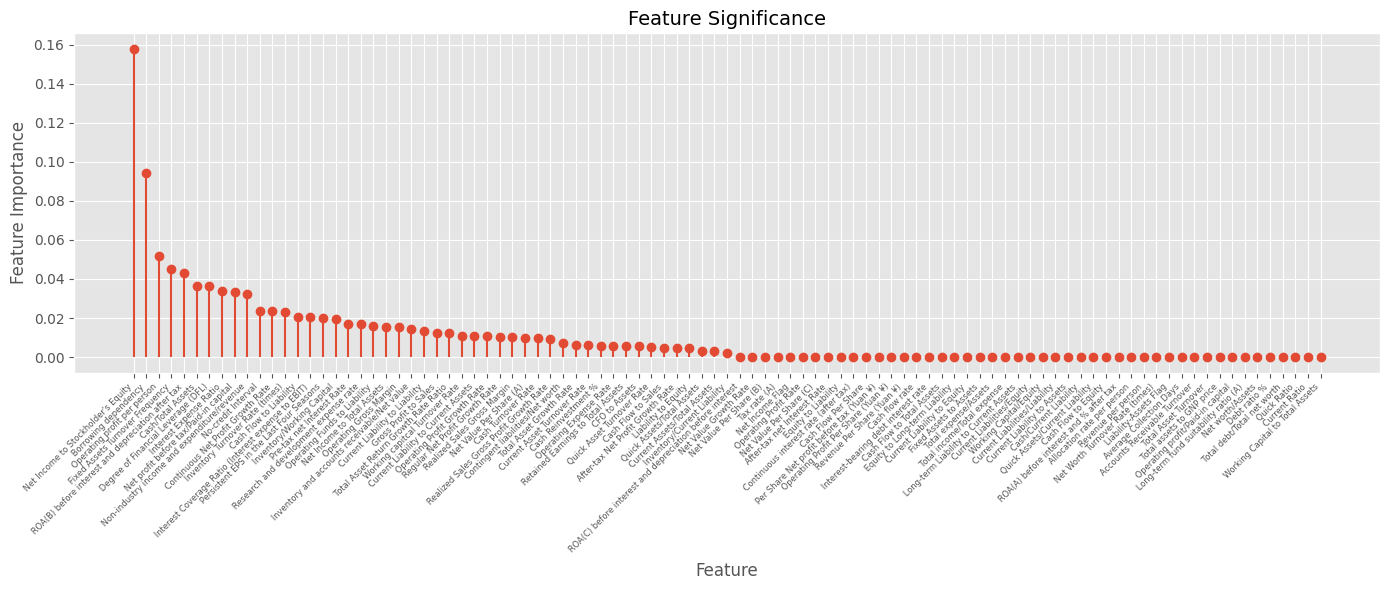

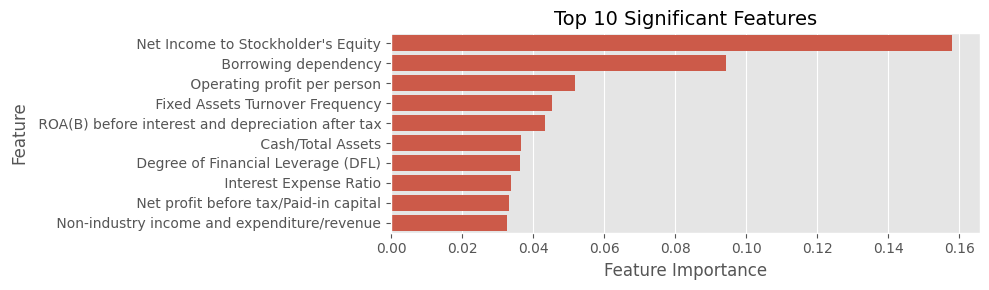

In [ ]:
plot_feature_importance(dt_model)

##### 3.4.2 Random Forest

In [ ]:
rf_model = RandomForestClassifier(
    random_state=rng_seed,
    class_weight='balanced'  # Handles class imbalance
)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'max_features': ['sqrt', 'log2'],   # Features considered at each split
    'n_estimators': np.linspace(2, 100, 5, dtype=int)  # Number of trees in the forest
}

# Use GridSearchCV for hyperparameter tuning
rf_gs = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='recall',   # Using recall to focus on the minority class
    cv=cvfolds,
    refit='recall',
    n_jobs=-1  # Parallelize across all CPU cores
)

# Fit the model
rf_gs.fit(Xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=2434),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': array([  2,  26,  51,  75, 100])},
             refit='recall', scoring='recall')

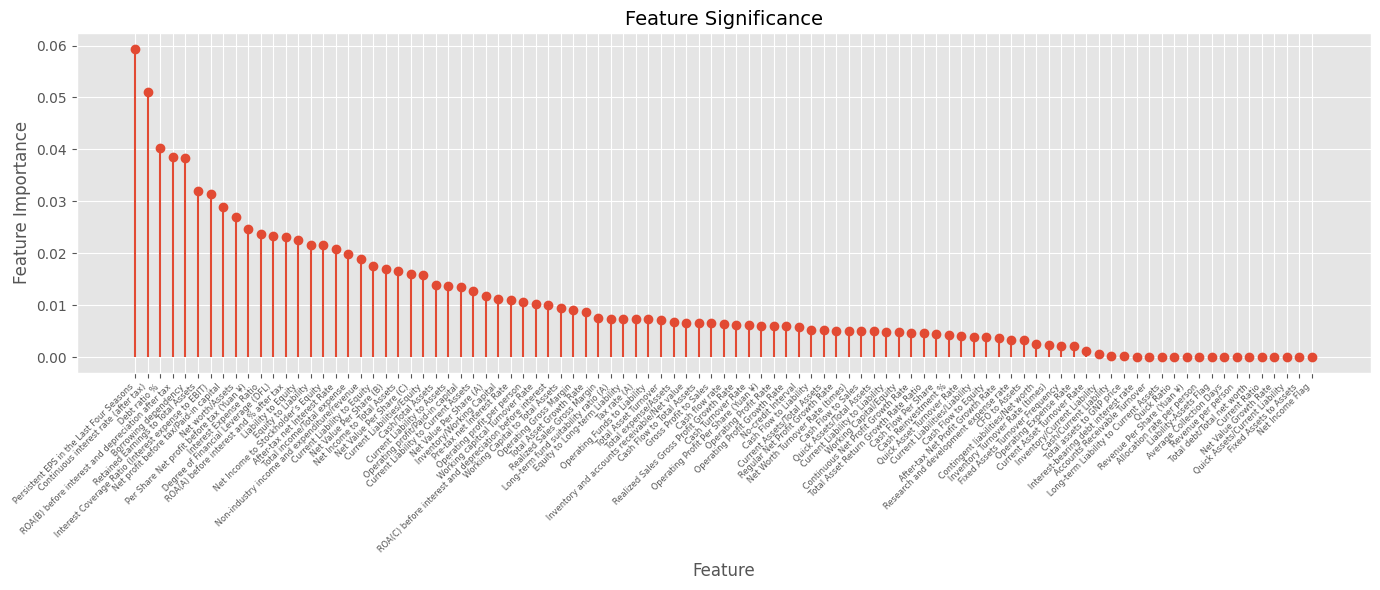

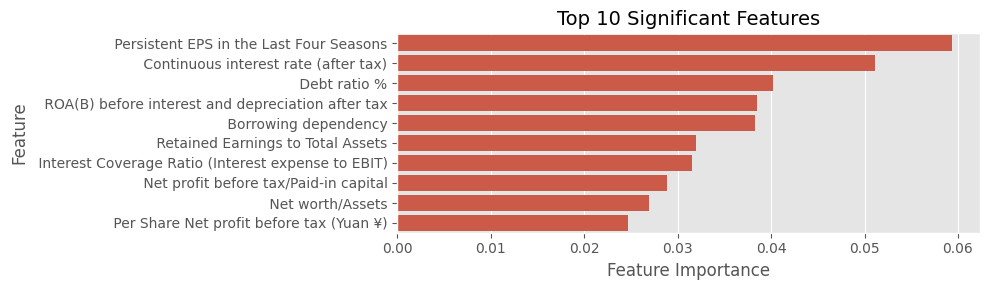

In [ ]:
# Extract the best model from the GridSearchCV
rf_best_model = rf_gs.best_estimator_

plot_feature_importance(rf_best_model)

##### 3.4.3 Gradient Boosting Classifier

In [ ]:
# Compute sample weights for the imbalanced dataset
sample_weights = compute_sample_weight(class_weight='balanced', y=ytrain)

# Define the model
gbc_model = GradientBoostingClassifier(random_state=rng_seed)

# Define the parameter grid for GradientBoostingClassifier
param_grid_gbc = {
    'learning_rate': [0.1, 1.0],
    'n_estimators': [50, 75, 100]
}

# Use GridSearchCV for hyperparameter tuning
gbc_gs = GridSearchCV(
    estimator=gbc_model,
    param_grid=param_grid_gbc,
    scoring='recall',   # Focus on recall to address the imbalanced dataset
    cv=cvfolds,
    refit='recall',
    n_jobs=-1  # Use all CPU cores
)

# Fit the model with sample weights
gbc_gs.fit(Xtrain, ytrain, sample_weight=sample_weights)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=2434),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1.0],
                         'n_estimators': [50, 75, 100]},
             refit='recall', scoring='recall')

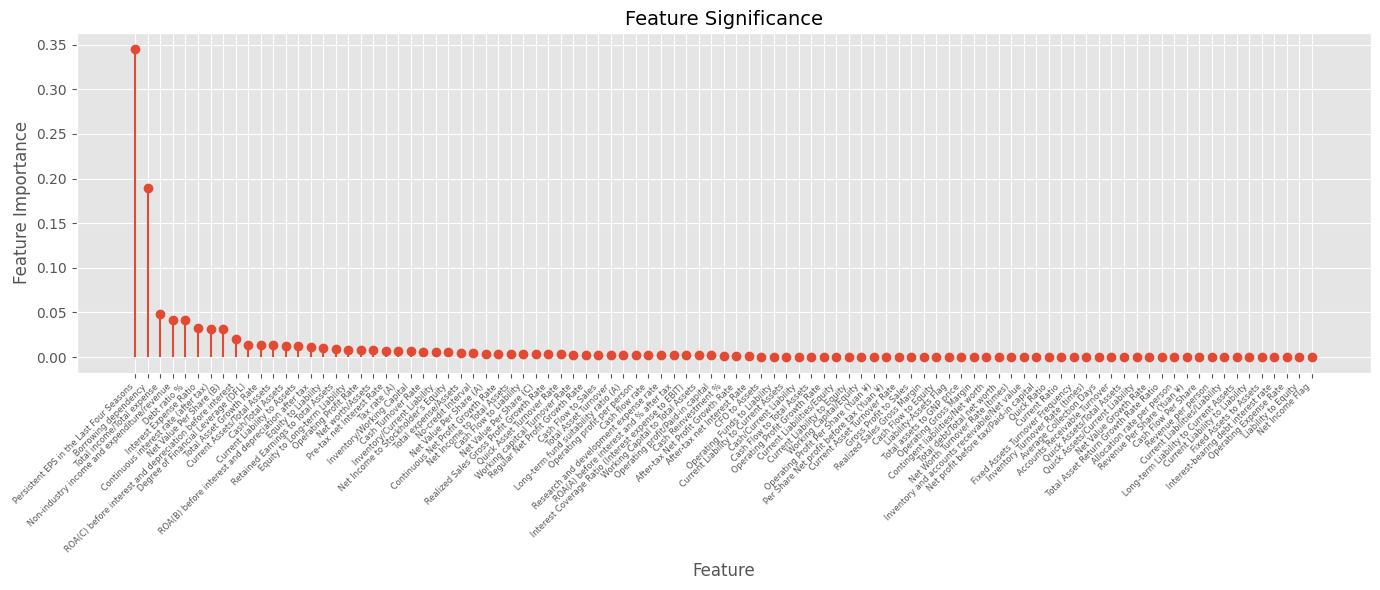

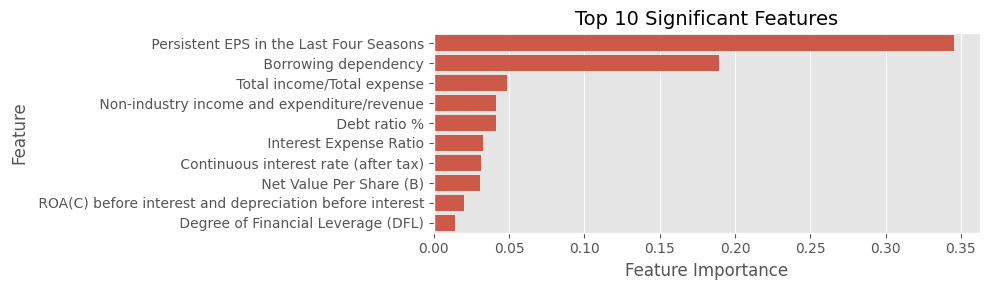

In [ ]:
# Extract the best model from GridSearchCV
best_gbc_model = gbc_gs.best_estimator_

plot_feature_importance(best_gbc_model)

##### 3.4.4 Adaboost

In [ ]:
base_estimator = DecisionTreeClassifier(
    max_depth=1,  # Keeps the weak learners simple (decision stumps)
    class_weight='balanced',
    random_state=rng_seed
)

# Define the AdaBoost model with the base estimator
ab_model = AdaBoostClassifier(
    estimator=base_estimator,
    algorithm='SAMME',
    random_state=rng_seed
)

param_grid_ab = {
    'learning_rate' : [0.01,0.1],
    'n_estimators': np.linspace(20, 100, 5, dtype=int) }

# Use GridSearchCV for hyperparameter tuning
ab_gs = GridSearchCV(
    estimator=ab_model,
    param_grid=param_grid_ab,
    scoring='recall',   # Focus on recall to address the imbalanced dataset
    cv=cvfolds,
    refit='recall',
    n_jobs=-1  # Use all CPU cores
)

ab_gs.fit(Xtrain, ytrain)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                           max_depth=1,
                                                                           random_state=2434),
                                          random_state=2434),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': array([ 20,  40,  60,  80, 100])},
             refit='recall', scoring='recall')

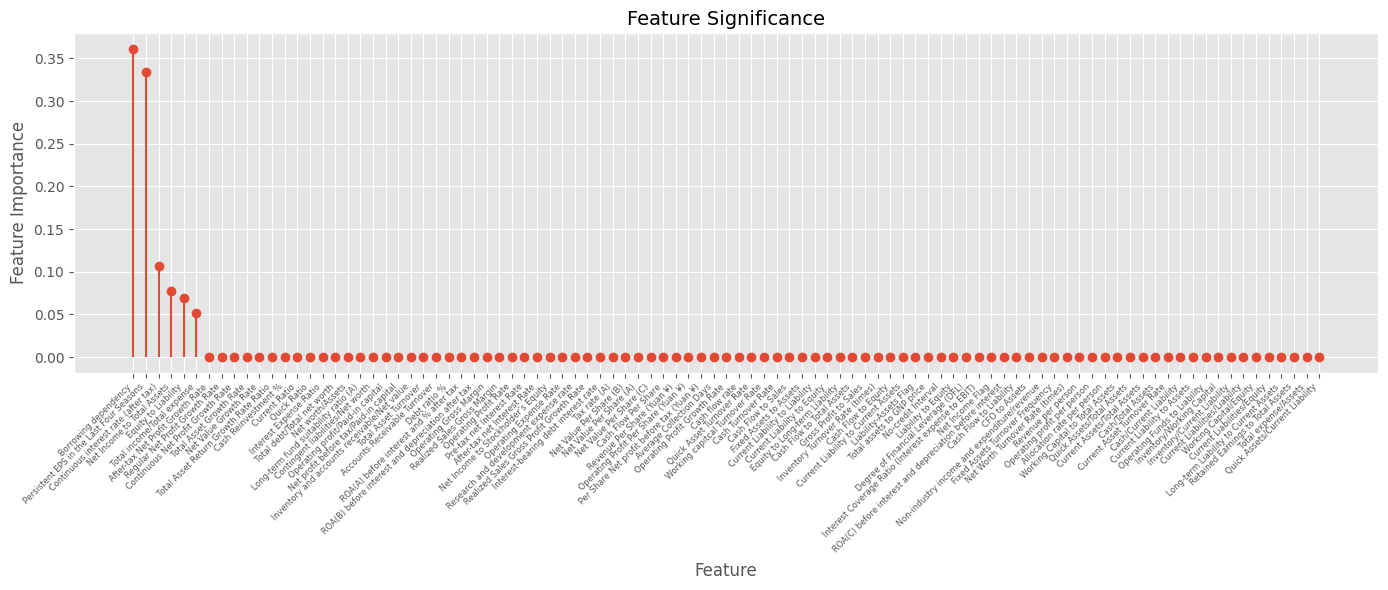

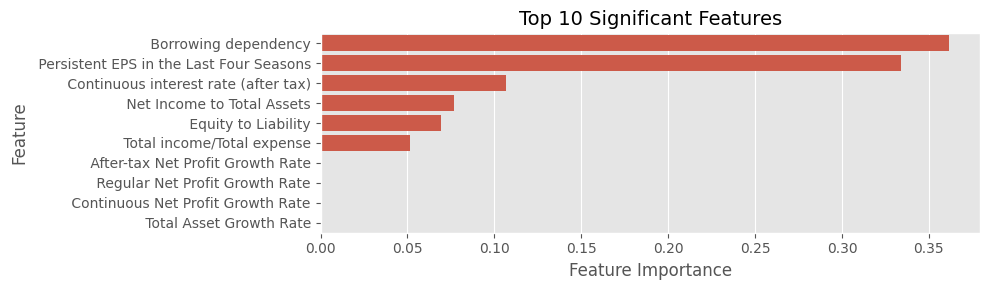

In [ ]:
# Extract the best model from GridSearchCV
best_ab_model = ab_gs.best_estimator_

plot_feature_importance(best_ab_model)

#### 3.5 Neural Network

In [ ]:
neuralNetwork = Sequential([
    Dense(64, activation='relu', input_shape=(95,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') # Could have used softmax, but since the problem is binary we save computation time
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
neuralNetwork.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,257 (32.25 KB)

 Trainable params: 8,257 (32.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
neuralNetwork.compile(loss='binary_crossentropy')

In [ ]:
trainhist = neuralNetwork.fit(Xtrain,
                          ytrain,
                          epochs=100,
                          batch_size=32,
                          )

Epoch 1/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2679
Epoch 2/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0962
Epoch 3/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0940
Epoch 4/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0828
Epoch 5/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0772
Epoch 6/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0789
Epoch 7/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0706
Epoch 8/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0635
Epoch 9/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0619
Epoch 10/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0589
Epoch 11/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0663
Epoch 12/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0610
Epoch 13/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0571
Epoch 14/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0497
Epoch 15/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0

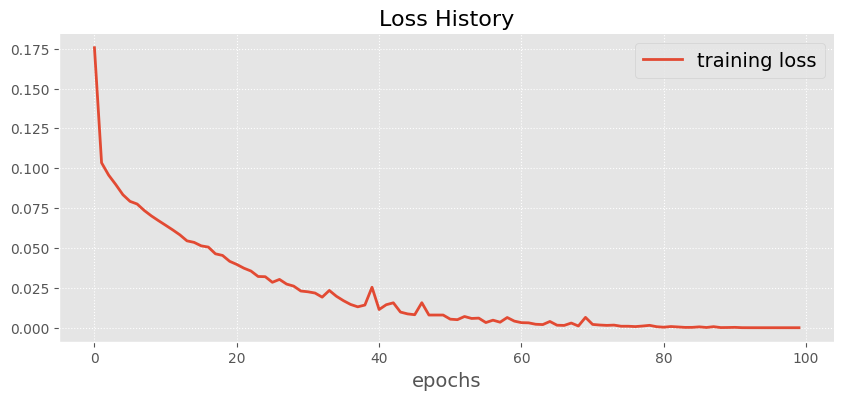

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the training and validation loss
ax.plot(trainhist.history['loss'], linewidth=2, label='training loss')
ax.grid(linestyle=':')
ax.legend(fontsize=14)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('epochs', fontsize=14)
ax.set_title('Loss History', fontsize=16)
plt.show()

### **4. Results**

In [ ]:
# Evaluating all the models on unseen data:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=rng_seed))
])


# Now we can evaluate the models on the test data

# Simple logistic regression model:
ypred_SimpleLogReg = simple_LogReg_model.fit(Xtrain, ytrain).predict(Xtest)
tn_SimpleLogReg, fp_SimpleLogReg, fn_SimpleLogReg, tp_SimpleLogReg = confusion_matrix(ytest, ypred_SimpleLogReg).ravel()
tpr_SimpleLogReg = tp_SimpleLogReg / (tp_SimpleLogReg + fn_SimpleLogReg)
tnr_SimpleLogReg = tn_SimpleLogReg / (tn_SimpleLogReg + fp_SimpleLogReg)
# legger til precicion: TP / (TP + FP)
precicion_SimpleLogReg = tp_SimpleLogReg / (tp_SimpleLogReg + fp_SimpleLogReg)
f1_SimpleLogReg = f1_score(ytest, ypred_SimpleLogReg)
accuracy_SimpleLogReg = simple_LogReg_model.score(Xtest, ytest)

# Correlation:
model_Corr = pipeline.fit(Xtrain[features_Corr], ytrain)
ypred_Corr = model_Corr.predict(Xtest[features_Corr])
tn_Corr, fp_Corr, fn_Corr, tp_Corr = confusion_matrix(ytest, ypred_Corr).ravel()
#tpr_Corr = tp_Corr / (tp_Corr + fn_Corr)
tnr_Corr = tn_Corr / (tn_Corr + fp_Corr)
tpr_Corr = recall_score(ytest, ypred_Corr)

precicion_Corr = tp_Corr / (tp_Corr + fp_Corr)
f1_Corr = f1_score(ytest, ypred_Corr)
accuracy_Corr = model_Corr.score(Xtest[features_Corr], ytest)

# Variance Threshold:
model_VarThresh = pipeline.fit(Xtrain[features_VarTresh], ytrain)
ypred_VarThresh = model_VarThresh.predict(Xtest[features_VarTresh])
tn_VarThresh, fp_VarThresh, fn_VarThresh, tp_VarThresh = confusion_matrix(ytest, ypred_VarThresh).ravel()
tpr_VarThresh = tp_VarThresh / (tp_VarThresh + fn_VarThresh)
tnr_VarThresh = tn_VarThresh / (tn_VarThresh + fp_VarThresh)
precicion_VarThresh = tp_VarThresh / (tp_VarThresh + fp_VarThresh)
f1_VarThresh = f1_score(ytest, ypred_VarThresh)
accuracy_VarThresh = model_VarThresh.score(Xtest[features_VarTresh], ytest)

# Forward Selection
model_forward = pipeline.fit(Xtrain[features_fs], ytrain)
ypred_forward = model_forward.predict(Xtest[features_fs])
tn_forward, fp_forward, fn_forward, tp_forward = confusion_matrix(ytest, ypred_forward).ravel()
tpr_forward = tp_forward / (tp_forward + fn_forward)
tnr_forward = tn_forward / (tn_forward + fp_forward)
precicion_forward = tp_forward / (tp_forward + fp_forward)
f1_forward = f1_score(ytest, ypred_forward)
accuracy_forward = model_forward.score(Xtest[features_fs], ytest)

# Backward Selection
model_backward = pipeline.fit(Xtrain[features_bs], ytrain)
ypred_backward = model_backward.predict(Xtest[features_bs])
tn_backward, fp_backward, fn_backward, tp_backward = confusion_matrix(ytest, ypred_backward).ravel()
tpr_backward = tp_backward / (tp_backward + fn_backward)
tnr_backward = tn_backward / (tn_backward + fp_backward)
precicion_backward = tp_backward / (tp_backward + fp_backward)
f1_backward = f1_score(ytest, ypred_backward)
accuracy_backward = model_backward.score(Xtest[features_bs], ytest)

# LASSO Regularization
ypred_LASSO = best_model_LASSO.predict(Xtest)
tn_LASSO, fp_LASSO, fn_LASSO, tp_LASSO = confusion_matrix(ytest, ypred_LASSO).ravel()
tpr_LASSO = tp_LASSO / (tp_LASSO + fn_LASSO)
tnr_LASSO = tn_LASSO / (tn_LASSO + fp_LASSO)
precicion_LASSO = tp_LASSO / (tp_LASSO + fp_LASSO)
f1_LASSO = f1_score(ytest, ypred_LASSO)
accuracy_LASSO = best_model_LASSO.score(Xtest, ytest)

# RIDGE Regularization
ypred_RIDGE = best_model_RIDGE.predict(Xtest)
tn_RIDGE, fp_RIDGE, fn_RIDGE, tp_RIDGE = confusion_matrix(ytest, ypred_RIDGE).ravel()
tpr_RIDGE = tp_RIDGE / (tp_RIDGE + fn_RIDGE)
tnr_RIDGE = tn_RIDGE / (tn_RIDGE + fp_RIDGE)
precicion_RIDGE = tp_RIDGE / (tp_RIDGE + fp_RIDGE)
f1_RIDGE = f1_score(ytest, ypred_RIDGE)
accuracy_RIDGE = best_model_RIDGE.score(Xtest, ytest)

# Decicion Trees
ypred_DT = dt_model.predict(Xtest)
tn_DT, fp_DT, fn_DT, tp_DT = confusion_matrix(ytest, ypred_DT).ravel()
tpr_DT = tp_DT / (tp_DT + fn_DT)
tnr_DT = tn_DT / (tn_DT + fp_DT)
precicion_DT = tp_DT / (tp_DT + fp_DT)
f1_DT = f1_score(ytest, ypred_DT)
accuracy_DT = dt_model.score(Xtest, ytest)

# Random Forest
ypred_RF = rf_best_model.predict(Xtest)
tn_RF, fp_RF, fn_RF, tp_RF = confusion_matrix(ytest, ypred_RF).ravel()
tpr_RF = tp_RF / (tp_RF + fn_RF)
tnr_RF = tn_RF / (tn_RF + fp_RF)
precicion_RF = tp_RF / (tp_RF + fp_RF)
f1_RF = f1_score(ytest, ypred_RF)
accuracy_RF = rf_best_model.score(Xtest, ytest)

# GBC
ypred_GBC = best_gbc_model.predict(Xtest)
tn_GBC, fp_GBC, fn_GBC, tp_GBC = confusion_matrix(ytest, ypred_GBC).ravel()
tpr_GBC = tp_GBC / (tp_GBC + fn_GBC)
tnr_GBC = tn_GBC / (tn_GBC + fp_GBC)
precicion_GBC = tp_GBC / (tp_GBC + fp_GBC)
f1_GBC = f1_score(ytest, ypred_GBC)
accuracy_GBC = best_gbc_model.score(Xtest, ytest)

# Adaboost
ypred_AB = best_ab_model.predict(Xtest)
tn_AB, fp_AB, fn_AB, tp_AB = confusion_matrix(ytest, ypred_AB).ravel()
tpr_AB = tp_AB / (tp_AB + fn_AB)
tnr_AB = tn_AB / (tn_AB + fp_AB)
precicion_AB = tp_AB / (tp_AB + fp_AB)
f1_AB = f1_score(ytest, ypred_AB)
accuracy_AB = best_ab_model.score(Xtest, ytest)


# Neural Network
ypred_NN = (neuralNetwork.predict(Xtest) > 0.5).astype(int)
tn_NN, fp_NN, fn_NN, tp_NN = confusion_matrix(ytest, ypred_NN).ravel()
tpr_NN = tp_NN / (tp_NN + fn_NN)
tnr_NN = tn_NN / (tn_NN + fp_NN)
precicion_NN = tp_NN / (tp_NN + fp_NN)
f1_NN = f1_score(ytest, ypred_NN)
accuracy_NN = accuracy_score(ytest, ypred_NN)




results = {
    "Method": ["Simple Logistic Regression","Correlation", "Variance Threshold", "Forward Selection", "Backward Selection", "LASSO Regularization", "RIDGE Regularization", "Decision Trees", "Random Forest", "GBC", "Adaboost", "Neural Network"],
    "Precision": [precicion_SimpleLogReg, precicion_Corr, precicion_VarThresh, precicion_forward, precicion_backward, precicion_LASSO, precicion_RIDGE, precicion_DT, precicion_RF, precicion_GBC, precicion_AB, precicion_NN],
    "TPR": [tpr_SimpleLogReg, tpr_Corr, tpr_VarThresh, tpr_forward, tpr_backward, tpr_LASSO, tpr_RIDGE, tpr_DT, tpr_RF, tpr_GBC, tpr_AB, tpr_NN],
    "F1 Score": [f1_SimpleLogReg, f1_Corr, f1_VarThresh, f1_forward, f1_backward, f1_LASSO, f1_RIDGE, f1_DT, f1_RF, f1_GBC, f1_AB, f1_NN],
    "Accuracy": [accuracy_SimpleLogReg, accuracy_Corr, accuracy_VarThresh, accuracy_forward, accuracy_backward, accuracy_LASSO, accuracy_RIDGE, accuracy_DT, accuracy_RF, accuracy_GBC, accuracy_AB, accuracy_NN],
    "TNR": [tnr_SimpleLogReg, tnr_Corr, tnr_VarThresh, tnr_forward, tnr_backward, tnr_LASSO, tnr_RIDGE, tnr_DT, tnr_RF, tnr_GBC, tnr_AB, tnr_NN]
}

results_df = pd.DataFrame(results)
results_df.drop_duplicates()
results_df

<ipython-input-42-af9b617df4a3>:28: RuntimeWarning: invalid value encountered in scalar divide
  precicion_Corr = tp_Corr / (tp_Corr + fp_Corr)
<ipython-input-42-af9b617df4a3>:48: RuntimeWarning: invalid value encountered in scalar divide
  precicion_forward = tp_forward / (tp_forward + fp_forward)
<ipython-input-42-af9b617df4a3>:85: RuntimeWarning: invalid value encountered in scalar divide
  precicion_DT = tp_DT / (tp_DT + fp_DT)
<ipython-input-42-af9b617df4a3>:94: RuntimeWarning: invalid value encountered in scalar divide
  precicion_RF = tp_RF / (tp_RF + fp_RF)
<ipython-input-42-af9b617df4a3>:103: RuntimeWarning: invalid value encountered in scalar divide
  precicion_GBC = tp_GBC / (tp_GBC + fp_GBC)
<ipython-input-42-af9b617df4a3>:112: RuntimeWarning: invalid value encountered in scalar divide
  precicion_AB = tp_AB / (tp_AB + fp_AB)


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<ipython-input-42-af9b617df4a3>:122: RuntimeWarning: invalid value encountered in scalar divide
  precicion_NN = tp_NN / (tp_NN + fp_NN)


Method  Precision       TPR  F1 Score  Accuracy  \
0   Simple Logistic Regression   0.022472  0.238095  0.041068  0.657625   
1                  Correlation        NaN  0.000000  0.000000  0.969208   
2           Variance Threshold   0.037657  0.214286  0.064057  0.807185   
3            Forward Selection        NaN  0.000000  0.000000  0.969208   
4           Backward Selection   0.022075  0.238095  0.040404  0.651760   
5         LASSO Regularization   0.052632  0.309524  0.089965  0.807185   
6         RIDGE Regularization   0.028340  0.166667  0.048443  0.798387   
7               Decision Trees        NaN  0.000000  0.000000  0.969208   
8                Random Forest        NaN  0.000000  0.000000  0.969208   
9                          GBC        NaN  0.000000  0.000000  0.969208   
10                    Adaboost        NaN  0.000000  0.000000  0.969208   
11              Neural Network        NaN  0.000000  0.000000  0.969208   

         TNR  
0   0.670953  
1   1.000000  
2   0.826021  
3   1.000000  
4   0.664902  
5   0.822995  
6   0.818457  
7   1.000000  
8   1.000000  
9   1.000000  
10  1.000000  
11  1.000000

### **5. Analysis**

See project report part 5

### **6. Conclusion**

See project report part 6